In [1]:
### Plot paired simulation noise-biases for thesis chapter 3 using Planck style guides
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Configure Matplotlib options
from setup_matplotlib import *
from matplotlib.ticker import MaxNLocator

In [57]:
# Read in data from paired simulations

L, N0_equi_paired, N0_equi_err = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/Plots/paper_plots/Paired_sim_data/N0_kappa_noise.txt")
_, N1_equi_paired, N1_equi_err = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/Plots/paper_plots/Paired_sim_data/NONOISE_EQUI_N1_bs_kappa.txt")
_, N1_fold_paired, N1_fold_err = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/Plots/paper_plots/Paired_sim_data/NONOISE_N1_bs_FOLD_kappa.txt")

# Read in numerical results

L_N0_num = np.load("/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/N0_numerical_vegas/L_N0_num.npy")
N0_numerical_equi = np.load("/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/N0_numerical_vegas/N0_numerical_equi.npy")
L_N0_num = np.array(L_N0_num, dtype=np.float128)
N0_numerical_equi = np.array(N0_numerical_equi, dtype=np.float128)
# Read in Alba's results
L_alba, N0_alba = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/N0_numerical_vegas/alba_n0.txt", unpack = True)

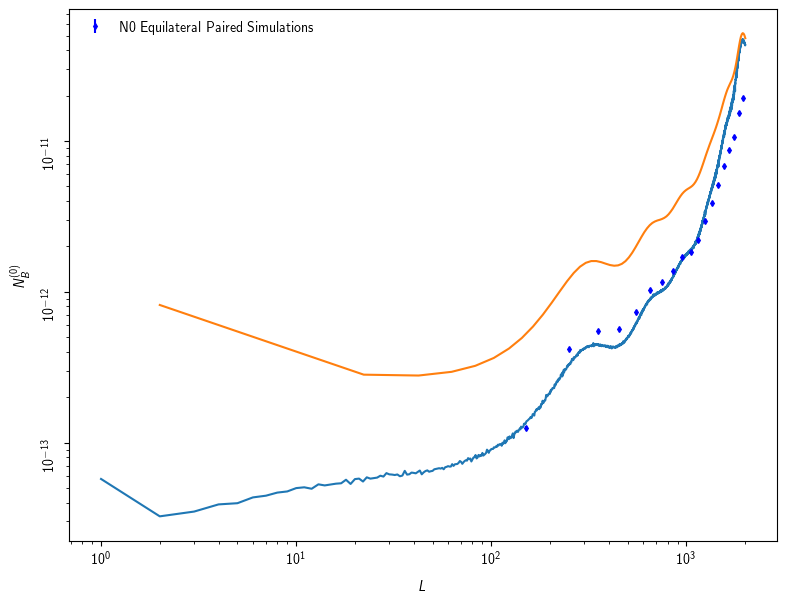

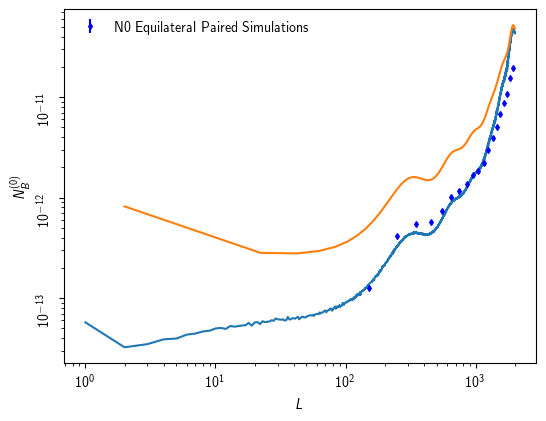

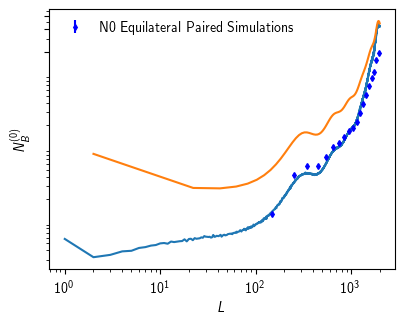

In [59]:
# Make N0 plot

for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)


    # equi bispectrum
    plt.errorbar(L, N0_equi_paired,yerr = N0_equi_err, fmt='bd', label="N0 Equilateral Paired Simulations", markersize=3)
    plt.plot(L_N0_num, 1/3*(L_N0_num*(L_N0_num + 1) )**3 *N0_numerical_equi)
    plt.plot(L_alba, 1/3 * (L_alba *(L_alba + 1)) **3*N0_alba)
    plt.xscale('log')
    plt.yscale('log')
    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"$N_B^{(0)}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    #plt.ylim(6e-13, 3e-11)
    #plt.xlim([600, 2000])

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/paired_sims/N0_equi_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)

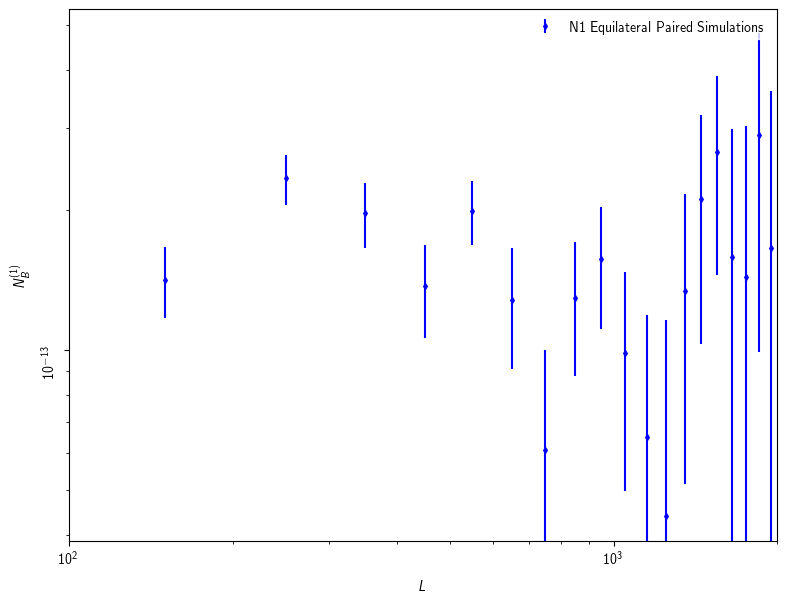

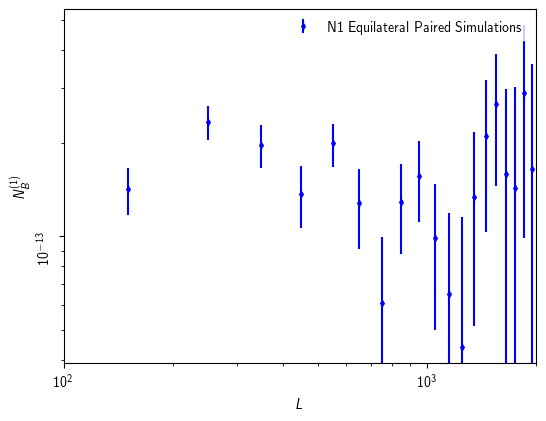

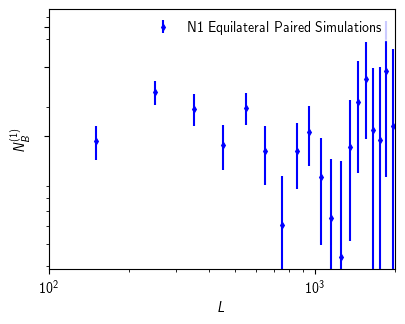

In [49]:
# Make N1 equilateral plots

for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    # equi bispectrum
    plt.errorbar(L, N1_equi_paired,yerr = N1_equi_err, fmt='bd', label="N1 Equilateral Paired Simulations", markersize=3)
    plt.xscale('log')
    plt.yscale('log')
    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"$N_B^{(1)}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    #plt.ylim(-4.8e-13, 2.5e-13)
    plt.xlim([100, 2000])

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/paired_sims/N1_equi_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)

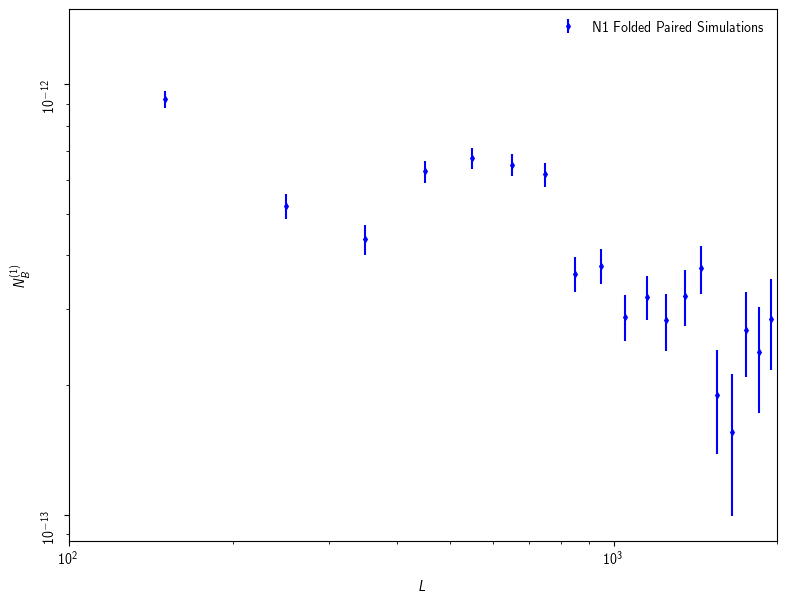

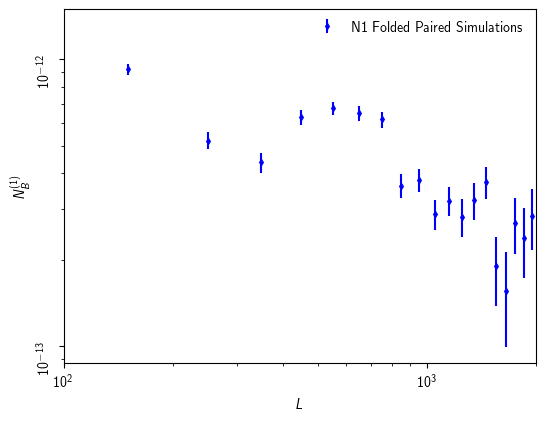

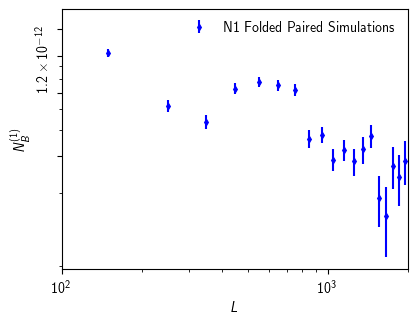

In [18]:
# Make N1 folded plots

for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    # equi bispectrum
    plt.errorbar(L, np.abs(N1_fold_paired),yerr = N1_fold_err, fmt='bd', label="N1 Folded Paired Simulations", markersize=3)
    plt.xscale('log')
    plt.yscale('log')
    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"$N_B^{(1)}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    #plt.ylim(-4.8e-13, 2.5e-13)
    plt.xlim([100, 2000])

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/paired_sims/N1_fold_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)